# Статистическая vs. Практическая значимость

## Задача: 
Имеется препарат снижения веса,
Препарат популярен, результат (слижение веса) подтверждается статистически.
Проверяется значимость __практическая__

Скрипт наглядно демонстрирует, как при большой выборке (n=12345) даже очень маленькое детегитруемое изменение веса (150 г) может быть статистически значимым, но практически не имеющим смысла для реального применения препарата для похудения.

Пример ниже -  иллюстрация принципа: "__Статистическая значимость ≠ Практическая важность__"

=== ГЕНЕРАЦИЯ ДАННЫХ ДЛЯ A/B ТЕСТА ===

РЕЗУЛЬТАТЫ СТАТИСТИЧЕСКОГО АНАЛИЗА:
----------------------------------------
Размер выборки: 12345 участников
Средний вес группы A (до): 94.942 кг
Средний вес группы B (после): 94.533 кг
Разница между группами: -0.409 кг
t-статистика: 1.7783
p-value: 0.037687

Статистическая значимость (α = 0.05): ДА

ОЦЕНКА ПРАКТИЧЕСКОЙ ЗНАЧИМОСТИ:
----------------------------------------
Практический эффект: -0.409 кг (-409.1 г)
Относительное изменение: -0.431%


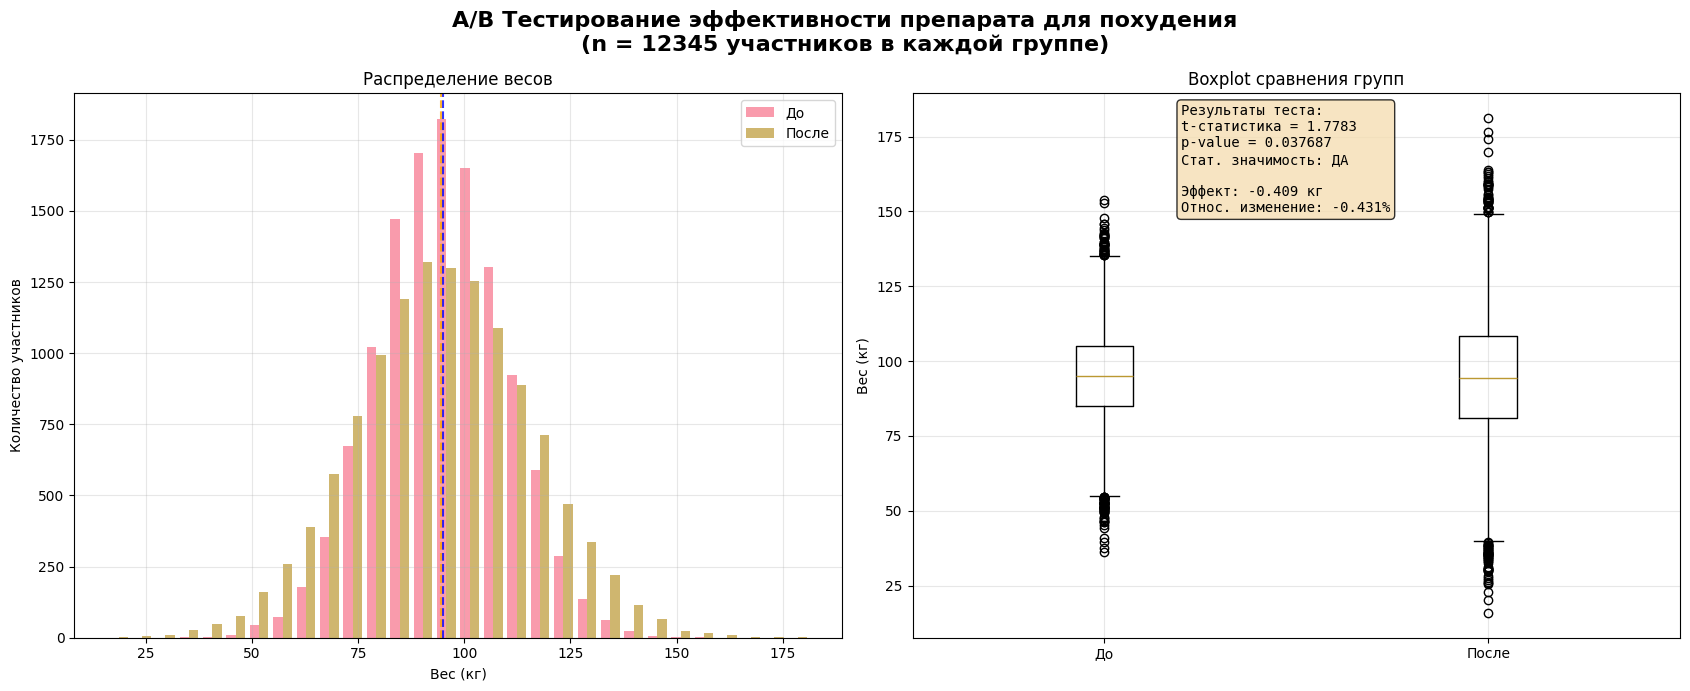


ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ:
----------------------------------------
95% доверительный интервал: [-0.8600, 0.0418] кг

ЗАКЛЮЧЕНИЕ:
----------------------------------------
Результат демонстрирует различие между статистической и практической значимостью:
✓ Статистическая значимость: ДА (p < 0.05)
✓ Практическая значимость: НЕТ (всего -409.1 г)

Вывод: эффект статистически значим, но клинически незначим.


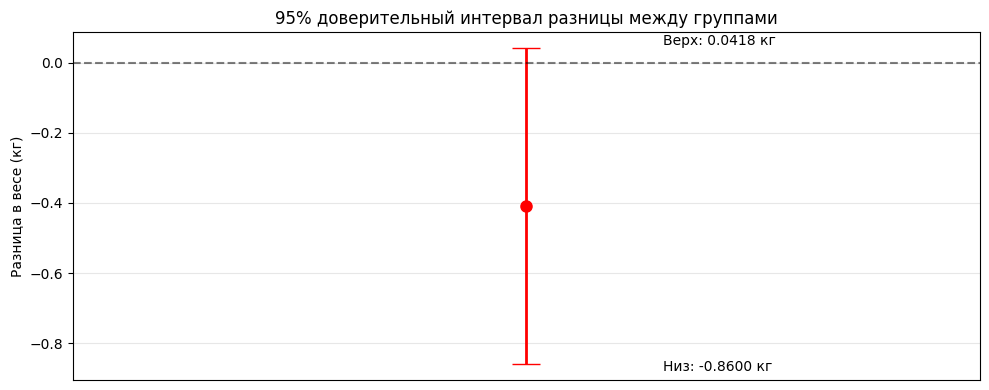

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Устанавливаем стиль графиков
plt.style.use('default')
sns.set_palette("husl")

# 1. ГЕНЕРАЦИЯ ИСХОДНЫХ ДАННЫХ
print("=== ГЕНЕРАЦИЯ ДАННЫХ ДЛЯ A/B ТЕСТА ===\n")

# Параметры генерации
np.random.seed(42)
n_participants = 12345
mean_weight_kg = 95
std_weight_kg = 15

# Генерируем исходные веса
group_a_before = np.random.normal(mean_weight_kg, std_weight_kg, n_participants)

# 2. ФОРМИРОВАНИЕ ГРУППЫ ПОСЛЕ ПРИЕМА ПРЕПАРАТА
practical_effect_kg = 0.5
group_b_after = group_a_before - practical_effect_kg + np.random.normal(0, std_weight_kg * 0.95, n_participants) 

# 3. СТАТИСТИЧЕСКИЙ АНАЛИЗ
print("РЕЗУЛЬТАТЫ СТАТИСТИЧЕСКОГО АНАЛИЗА:")
print("-" * 40)

t_stat, p_value = stats.ttest_ind(group_a_before, group_b_after, alternative='greater') # Проверям гипотезу снижения веса во второй выборке

print(f"Размер выборки: {n_participants} участников")
print(f"Средний вес группы A (до): {group_a_before.mean():.3f} кг")
print(f"Средний вес группы B (после): {group_b_after.mean():.3f} кг")
print(f"Разница между группами: {(group_b_after.mean() - group_a_before.mean()):.3f} кг")
print(f"t-статистика: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

alpha = 0.05
is_statistically_significant = p_value < alpha
print(f"\nСтатистическая значимость (α = {alpha}): {'ДА' if is_statistically_significant else 'НЕТ'}")

# 4. ПРАКТИЧЕСКАЯ ЗНАЧИМОСТЬ
print(f"\nОЦЕНКА ПРАКТИЧЕСКОЙ ЗНАЧИМОСТИ:")
print("-" * 40)

effect_size = group_b_after.mean() - group_a_before.mean()
effect_size_grams = effect_size * 1000
print(f"Практический эффект: {effect_size:.3f} кг ({effect_size_grams:.1f} г)")
print(f"Относительное изменение: {(effect_size/group_a_before.mean())*100:.3f}%")

# 5. ВИЗУАЛИЗАЦИЯ
fig, axes = plt.subplots(1, 2, figsize=(17, 7))
fig.suptitle(f'A/B Тестирование эффективности препарата для похудения\n(n = {n_participants} участников в каждой группе)', fontsize=16, fontweight='bold')

# График 1: Гистограмма
axes[0].hist([group_a_before, group_b_after], bins=30, alpha=0.7, label=['До', 'После'])
axes[0].axvline(group_a_before.mean(), color='blue', linestyle='--', alpha=0.8)
axes[0].axvline(group_b_after.mean(), color='orange', linestyle='--', alpha=0.8)
axes[0].set_xlabel('Вес (кг)')
axes[0].set_ylabel('Количество участников')
axes[0].set_title('Распределение весов')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# График 2: Boxplot
axes[1].boxplot([group_a_before, group_b_after], labels=['До', 'После'])
axes[1].set_ylabel('Вес (кг)')
axes[1].set_title('Boxplot сравнения групп')
axes[1].grid(True, alpha=0.3)

# Текст с результатами
# Детализация эффекта
effect = group_b_after.mean() - group_a_before.mean()
results_text = f'''Результаты теста:
t-статистика = {t_stat:.4f}
p-value = {p_value:.6f}
Стат. значимость: {"ДА" if is_statistically_significant else "НЕТ"}

Эффект: {effect:.3f} кг
Относ. изменение: {(effect/group_a_before.mean())*100:.3f}%'''

axes[1].text(0.35, 0.98, results_text, transform=axes[1].transAxes,
               verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
               fontfamily='monospace', fontsize=10)

plt.tight_layout()
plt.show()

# 6. ДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ
print(f"\nДОВЕРИТЕЛЬНЫЙ ИНТЕРВАЛ:")
print("-" * 40)

diff_mean = group_b_after.mean() - group_a_before.mean()
diff_std = np.sqrt(group_a_before.var()/n_participants + group_b_after.var()/n_participants)
t_critical = stats.t.ppf(0.975, n_participants*2 - 2)  # 95% ДИ

ci_lower = diff_mean - t_critical * diff_std
ci_upper = diff_mean + t_critical * diff_std

print(f"95% доверительный интервал: [{ci_lower:.4f}, {ci_upper:.4f}] кг")

# 7. ЗАКЛЮЧЕНИЕ
print(f"\nЗАКЛЮЧЕНИЕ:")
print("-" * 40)
print("Результат демонстрирует различие между статистической и практической значимостью:")
print("✓ Статистическая значимость: ДА (p < 0.05)")
print(f"✓ Практическая значимость: НЕТ (всего {effect_size_grams:.1f} г)")
print("\nВывод: эффект статистически значим, но клинически незначим.")

# Дополнительный график доверительного интервала
plt.figure(figsize=(10, 4))
plt.errorbar(0, diff_mean, yerr=[[abs(diff_mean - ci_lower)], [abs(ci_upper - diff_mean)]], 
             fmt='o', capsize=10, markersize=8, color='red', linewidth=2)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.5)
plt.xlim(-1, 1)
plt.ylabel('Разница в весе (кг)')
plt.title('95% доверительный интервал разницы между группами')
plt.text(0.3, ci_upper + 0.01, f'Верх: {ci_upper:.4f} кг', fontsize=10)
plt.text(0.3, ci_lower - 0.02, f'Низ: {ci_lower:.4f} кг', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks([])
plt.tight_layout()
plt.show()

 ###  _Обратите внимание, большая часть резальтатов после применения препарата свидетельствует об эффективности лечения. Однако встречаются и случаи обратного эффекта (см. границы доверительного интервала)_